In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [4]:
df = pd.read_csv('toyota.csv')


   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   eng

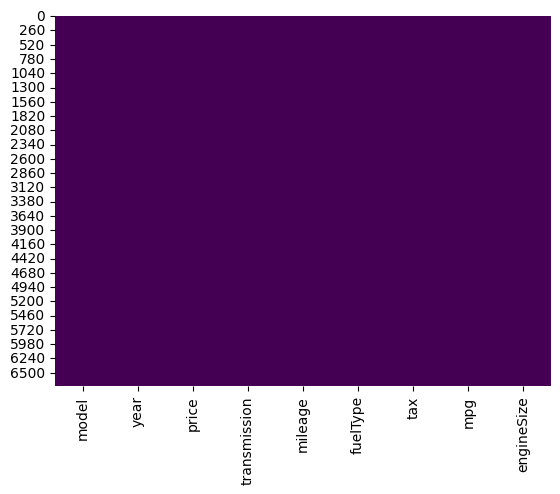

In [5]:
print(df.head())
print(df.info())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
print(df.describe())


In [6]:
print(df.columns)


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [7]:
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


ValueError: could not convert string to float: ' GT86'

<Figure size 1000x800 with 0 Axes>

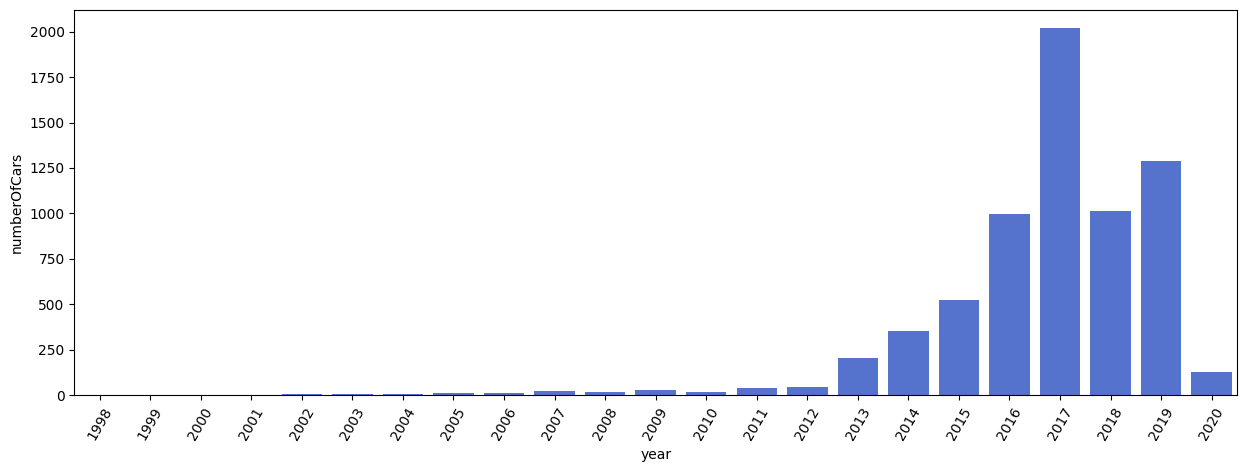

In [8]:
models = df.groupby('year').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'numberOfCars'})

# Plot
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=models['year'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)
plt.show()


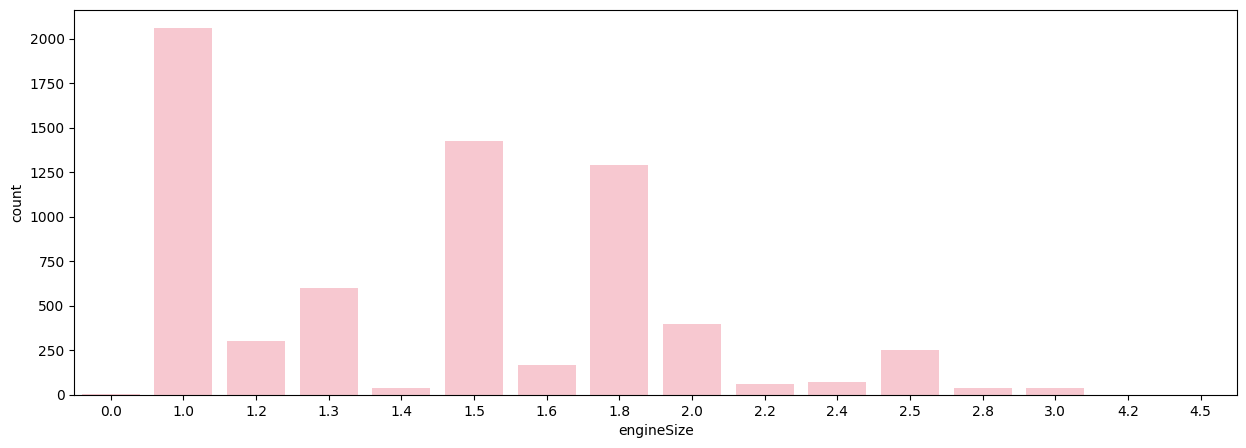

In [9]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax': 'count'})
plt.figure(figsize=(15, 5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='pink')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13224\17679836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'], kde=True)


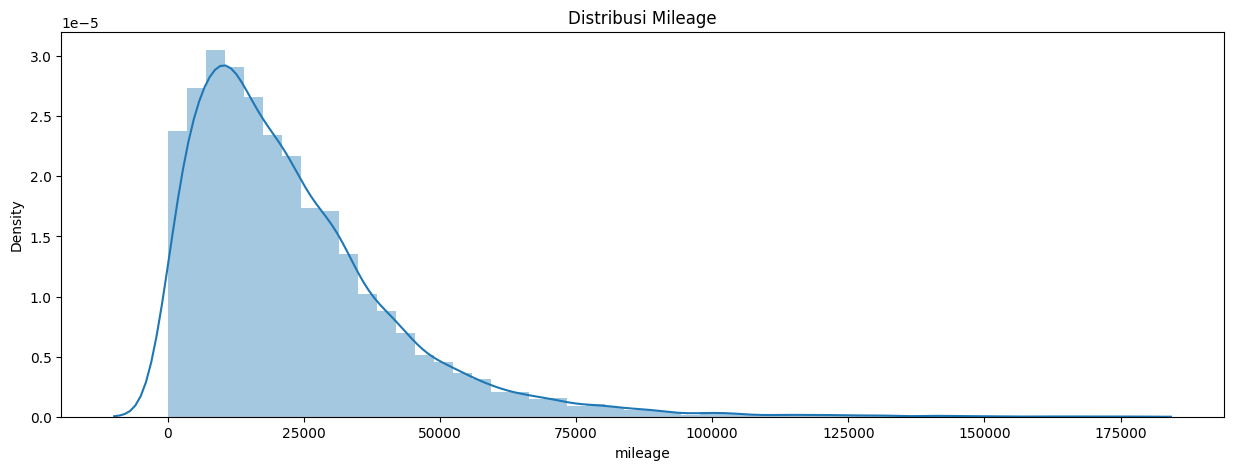

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13224\17679836.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=True)


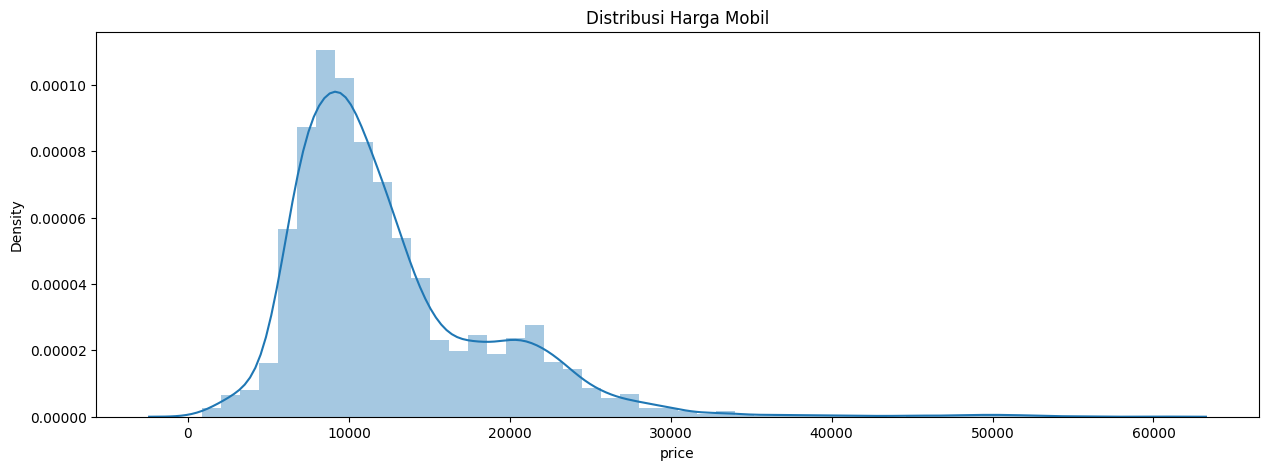

In [10]:
plt.figure(figsize=(15, 5))
sns.distplot(df['mileage'], kde=True)
plt.title('Distribusi Mileage')
plt.show()

plt.figure(figsize=(15, 5))
sns.distplot(df['price'], kde=True)
plt.title('Distribusi Harga Mobil')
plt.show()


In [11]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
print(f"Ukuran data testing: {x_test.shape}")


Ukuran data testing: (1685, 5)


In [13]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x_train, y_train)

# Prediksi
rf_pred = rf.predict(x_test)

# Evaluasi
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

print(f"Evaluasi Model Random Forest:")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


Evaluasi Model Random Forest:
Mean Absolute Error: 875.6902408365125
Root Mean Squared Error: 1291.9169016777828
R2 Score: 0.9560871760632513


In [14]:
input_data = np.array([[2019, 5000, 145, 30.2, 2]])  # Input
rf_prediction = rf.predict(input_data)
print('Estimasi harga mobil bekas dalam EUR (Random Forest):', rf_prediction)


Estimasi harga mobil bekas dalam EUR (Random Forest): [25443.85]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
filename_rf = 'estimasi_mobil_rf.sav'
pickle.dump(rf, open(filename_rf, 'wb'))
